# Assigment 3

## Question a

In the folder “assignment-2-data” there are 32 realization (about 65 k samples each) of a noisy voltage measured with a digital scope. Assuming stationarity and ergodicity perform the following exercises

Normalize the frequency axis and the amplitude axis of the spectral voltage density estimated in assignment 2. Hint: the integral of the spectral voltage density for all frequencies is equal to the signal variance and this can also be estimated using the time sequence

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data20 = pd.read_csv('./assignment-2-data/20210301-0002_20.csv',skiprows=1)

In [17]:
data20.describe()

,(ms),(V)
count,89290.000000,89290.000000
mean,5.000184,0.017659
std,2.886906,0.987993
min,0.000000,-3.016271
25%,2.500092,-0.722195
50%,5.000184,0.000000
75%,7.500276,0.722195
max,10.000368,3.398591


In [18]:
data30 = pd.read_csv('./assignment-2-data/20210301-0002_30.csv',skiprows=1)
data30.describe()

,(ms),(V)
count,89290.000000,89290.000000
mean,5.000184,0.019101
std,2.886906,0.981749
min,0.000000,-2.846334
25%,2.500092,-0.679595
50%,5.000184,0.000000
75%,7.500276,0.722195
max,10.000368,3.738466


mean, the variance and standard deviation  are similar: same value is rounded to two decimal digit. 
Data cam from 8 bit resolution ADC.

In [19]:
data20_array=  data20.loc[:,"(V)"].T.to_numpy()
data30_array=  data30.loc[:,"(V)"].T.to_numpy()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

#time vector
time20_array = data20.loc[:,"(ms)"].T.to_numpy()

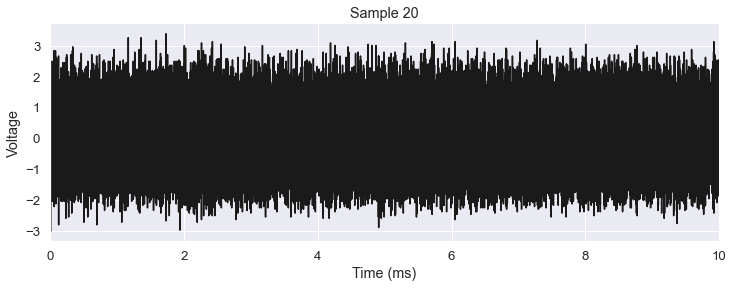

In [21]:
# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time20_array, data20_array, lw=1.5, color='k')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage')
plt.xlim([time20_array.min(), time20_array.max()])
plt.title('Sample 20')
sns.despine()

### Sampling period esitmation

We need duration, samplig period and sampling frequency for value normalization in spectral estimation

In [22]:
duration= (np.max(time20_array)/1000)
N_samples = time20_array.size
print("duration [s] : ",duration)

duration [s] :  0.01000036756


In [23]:
sp= duration / time20_array.size # sampling period definition
sf= 1/sp  # define sampling frequency
print("sampling period [s]: ",sp)


sampling period [s]:  1.1199874073244485e-07


### Test Sampling period estimation

Sampling period must be constant for a correct power density estimation.


In [24]:
sample_intervals = []
for index in range(1,time20_array.size):
    sample_intervals.append(time20_array[index]-time20_array[index-1])

print("mean sampling interval [s] : ",np.mean(sample_intervals)/1000)
print("sampling interval standard deviation: ",np.std(sample_intervals))

mean sampling interval [s] :  1.1199999507218135e-07
sampling interval standard deviation:  2.2193220384767263e-10


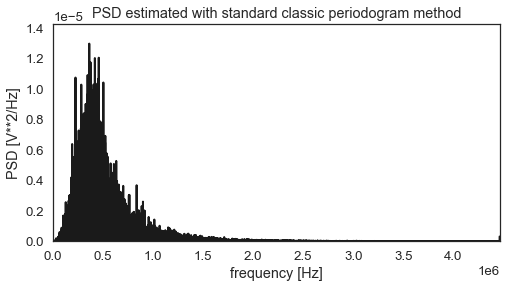

In [25]:
from scipy import signal
import matplotlib.pyplot as plt

freqs, Pxx_den = signal.periodogram(data20_array, sf)
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, Pxx_den, color='k', lw=2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.ylim([0, Pxx_den.max() * 1.1])
plt.title("PSD estimated with standard classic periodogram method")
plt.xlim([0, freqs.max()])
plt.show()

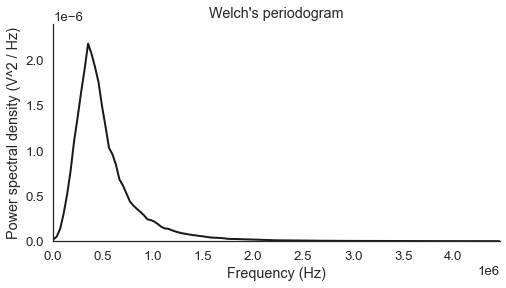

In [26]:
from scipy import signal

freqs, psd = signal.welch(data20_array, sf)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("PSD estimated with standard  Welch's method")
plt.xlim([0, freqs.max()])
sns.despine()

In [27]:
np.mean(data20_array)

0.017659496364318513

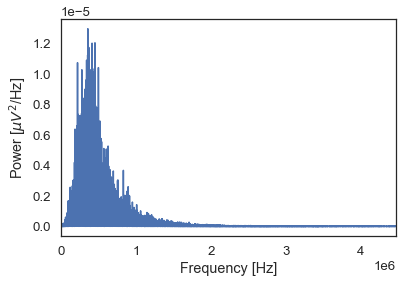

In [28]:
from scipy.fft import fft

T= duration

xf = fft(data20_array)       # Compute Fourier transform of x
Sxx = 2 * sp ** 2 / T * (xf * np.conj(xf)) # Compute spectrum
Sxx = Sxx[:int(len(data20_array) / 2)]             # Ignore negative frequencies

df = 1 / duration                  # Determine frequency resolution
fNQ = sf / 2                        # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)                # Construct frequency axis

plt.plot(faxis, np.real(Sxx))                  # Plot spectrum vs frequency
plt.xlim([0, freqs.max()])                         # Select frequency range
plt.xlabel('Frequency [Hz]')                # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

In [29]:
np.real(Sxx)

array([6.23738549e-06, 6.39050023e-09, 1.67993505e-09, ...,
       5.46037857e-10, 6.74667242e-10, 3.24046415e-10])

## Normalizzation Test

 Integral of the spectral voltage density for all frequencies is equal to the signal variance and this can also be estimated using the time sequence.



In [30]:
from scipy.integrate import simps

integral = simps(np.real(Sxx), faxis)
print("Integral of the spectral voltage density for all frequencies: ", integral)
print("Variance : ", np.var(data20_array))
print ("relative difference: ", integral/np.var(data20_array))


Integral of the spectral voltage density for all frequencies:  0.9771966394633937
Variance :  0.9761197888711037
relative difference:  1.0011031951247862


## Estimate autocorrelation





Using statsmodels ACF  https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html#statsmodels.tsa.stattools.acf

Reference: https://stackoverflow.com/questions/14297012/estimate-autocorrelation-using-python

x

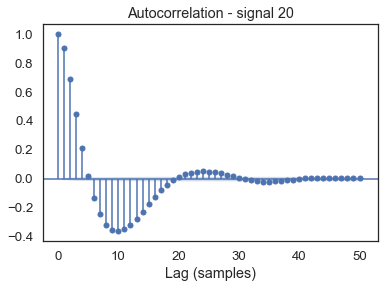

In [31]:
# Import required libraries
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(data20_array)
plt.title('Autocorrelation - signal 20')
plt.xlabel('Lag (samples)')
plt.ylabel('')
# Show plot
plt.show()

For white noise series, we expect each autocorrelation to be close to zero. Of course, they will not be exactly equal to zero as there is some random variation. For a white noise series, we expect 95% of the spikes in the ACF to lie within  
±
2
/
√
T
  where  
T
  is the length of the time series.

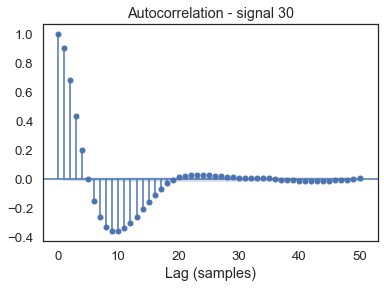

In [32]:

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(data30_array)

plt.title('Autocorrelation - signal 30')
plt.xlabel('Lag (samples)')
plt.ylabel('')

# Show plot
plt.show()

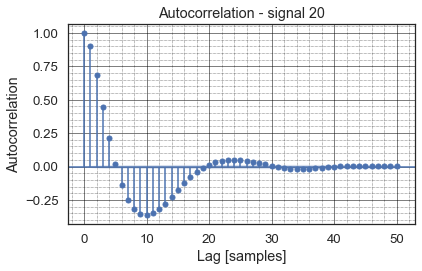

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data20_array)
plt.title('Autocorrelation - signal 20')
plt.xlabel('Lag [samples]')
plt.ylabel('Autocorrelation')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black',zorder=0)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black',zorder=0)

plt.tight_layout()


plt.show()